## Previous configuration

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load data

In [2]:
def load_dataset(dataset_path):
    dataset = []
    num_folders = sorted(os.listdir(dataset_path), key=lambda x: int(x))

    for num_folder in num_folders:
        num_folder_path = os.path.join(dataset_path, num_folder)
        for img_name in os.listdir(num_folder_path):
            img_path = os.path.join(num_folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            img = img/255.0
            dataset.append((img, num_folder))
    return dataset

dataset_path = "dataset"
dataset = load_dataset(dataset_path)
print("Number of images loaded:", len(dataset))
aux=[]
for img in dataset:
    aux.append(img[0])
data=np.array(aux)
labels=[]

for target in dataset:
    labels.append(target[1])
labels=np.array(labels)

Number of images loaded: 400


## Knn with raw data

Best accuracy: 0.8916666666666667
Best K: 1


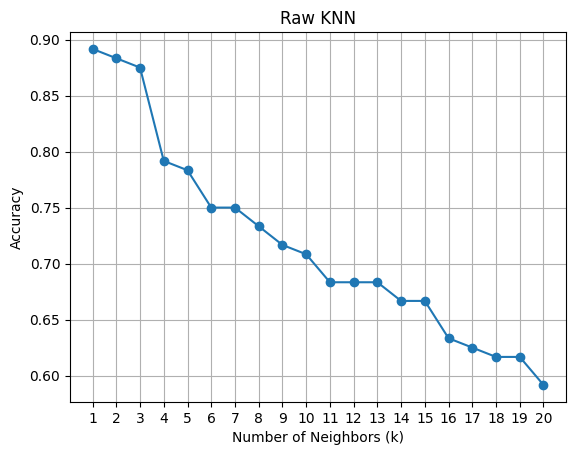

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

n_samples, height, width = X_train.shape
X_train = np.reshape(X_train, (n_samples, height * width))
n_samples, height, width = X_test.shape
X_test = np.reshape(X_test, (n_samples, height * width))

accuracies = []
k_values = range(1, 21)
max_accuracy = 0
best_k = 0

for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_k = k
print("Best accuracy: "+str(max_accuracy))
print("Best K: "+str(best_k))

eva_raw_knn=[max_accuracy,k]

plt.plot(k_values, accuracies, marker='o')
plt.title('Raw KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('evaluation/raw_knn.png')
plt.show()

## Knn with hog

Best accuracy: 0.8916666666666667
Best K: 1


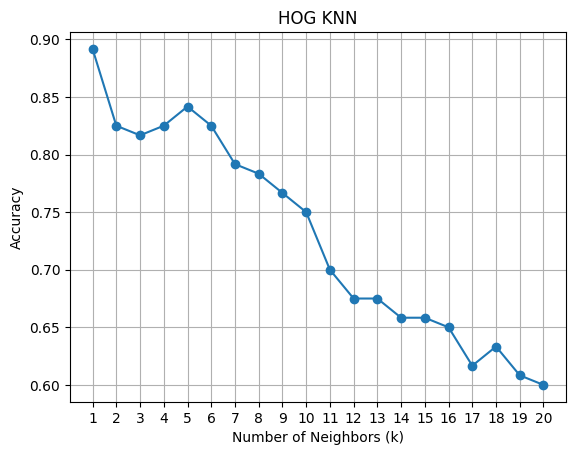

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

accuracies = []
k_values = range(1, 21)
max_accuracy = 0
best_k = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    hog_features_train = np.array([hog(image, pixels_per_cell=(16, 16), cells_per_block=(1, 1)) for image in X_train])
    knn.fit(hog_features_train, y_train)
    
    hog_features_test = np.array([hog(image, pixels_per_cell=(16, 16), cells_per_block=(1, 1)) for image in X_test])
    y_pred = knn.predict(hog_features_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_k = k

print("Best accuracy:", max_accuracy)
print("Best K:", best_k)

eva_hog_knn=[max_accuracy,k]

plt.plot(k_values, accuracies, marker='o')
plt.title('HOG KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('evaluation/hog_knn.png')
plt.show()

## Knn with  PCA

Best accuracy: 0.8916666666666667
Best K: 1


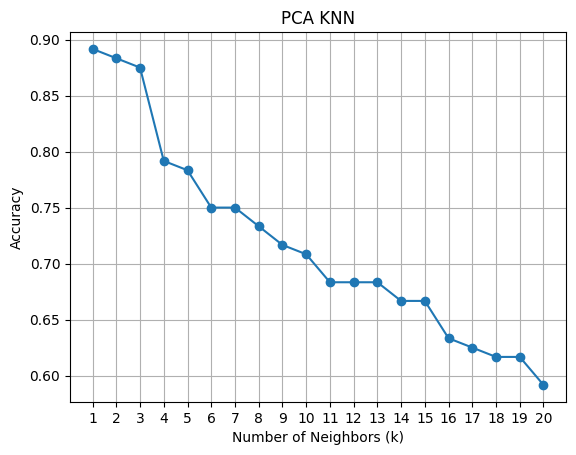

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

accuracies = []
k_values = range(1, 21)
max_accuracy = 0
best_k = 0

n_samples, height, width = X_train.shape
X_train = np.reshape(X_train, (n_samples, height * width))
n_samples, height, width = X_test.shape
X_test = np.reshape(X_test, (n_samples, height * width))

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train_pca, y_train)
    
    y_pred = knn.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_k = k

print("Best accuracy:", max_accuracy)
print("Best K:", best_k)

eva_pca_knn=[max_accuracy,k]

plt.plot(k_values, accuracies, marker='o')
plt.title('PCA KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('evaluation/pca_knn.png')
plt.show()

## Knn with hog and PCA

Best accuracy: 0.9
Best K: 1


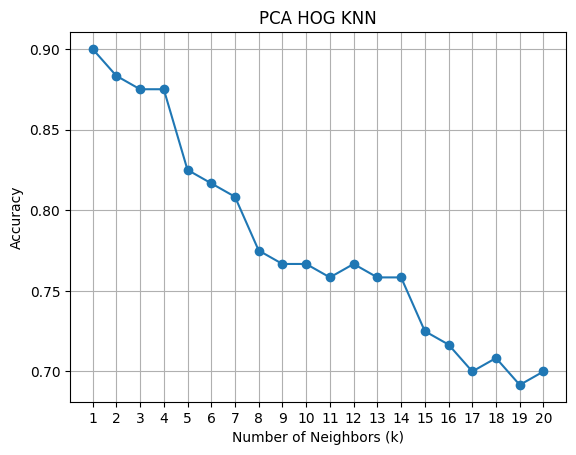

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

accuracies = []
k_values = range(1, 21)
max_accuracy = 0
best_k = 0

X_train2=[]
for img in X_train:
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=False)
    X_train2.append(hog_image)
X_train2=np.array(X_train2)

X_test2=[]
for img in X_test:
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=False)
    X_test2.append(hog_image)
X_test2=np.array(X_test2)

pca=PCA()
n_samples, height, width = X_train2.shape
X_train_reshaped = np.reshape(X_train2, (n_samples, height * width))
X_train_pca = pca.fit_transform(X_train_reshaped)

n_samples, height, width = X_test2.shape
X_test_reshaped = np.reshape(X_test2, (n_samples, height * width))
X_test_pca = pca.transform(X_test_reshaped)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train_pca, y_train)
    
    y_pred = knn.predict(X_test_pca)
    
    accuracy = knn.score(X_test_pca, y_test)
    accuracies.append(accuracy)
    
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_k = k

print("Best accuracy:", max_accuracy)
print("Best K:", best_k)

eva_pca_hog_knn=[max_accuracy,k]


plt.plot(k_values, accuracies, marker='o')
plt.title('PCA HOG KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('evaluation/hog_pca_knn.png')
plt.show()

## Eigenfaces

Best accuracy: 0.9
Best Components: 40


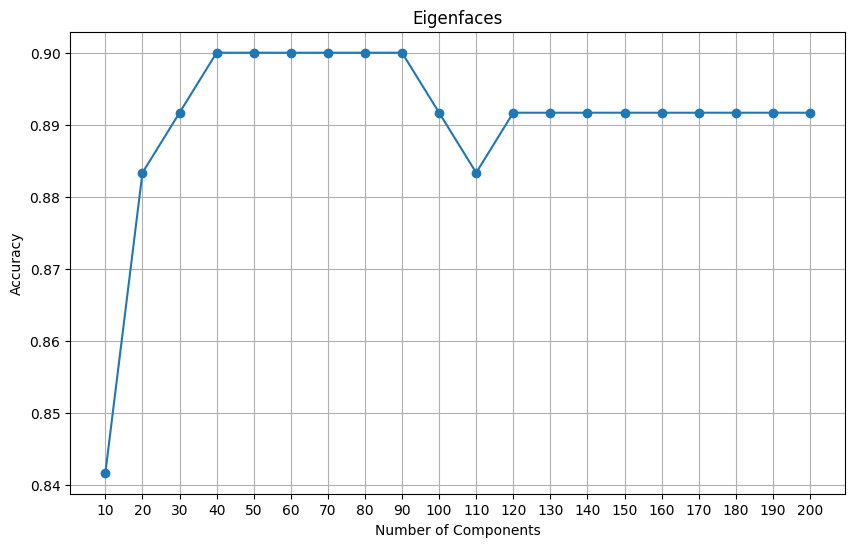

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

n_samples, height, width = X_train.shape
X_train = np.reshape(X_train, (n_samples, height * width))
n_samples, height, width = X_test.shape

pca = PCA()
pca.fit(X_train)

accuracies = []
max_accuracy = 0
best_n_components= 0
n_components = list(range(10, 201, 10))

for component in n_components:
    eigenfaces = pca.components_[:component]

    weights = eigenfaces @ (X_train - pca.mean_).T

    accuracy=0

    for i in range(X_test.shape[0]):
        img_weight = eigenfaces @ (X_test[i].reshape(1, -1) - pca.mean_).T
        euclidean_distance = np.linalg.norm(weights - img_weight, axis=0)
        best_match = np.argmin(euclidean_distance)

        height, width = X_test[i].shape
        gt = np.reshape(X_test[i], (height * width))

        if (y_test[i]==y_train[best_match]):
            accuracy+=1

    accuracy=accuracy/X_test.shape[0]
    accuracies.append(accuracy)
        
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_n_components = component
        
print("Best accuracy:", max_accuracy)
print("Best Components:", best_n_components)

eva_eigenfaces=[max_accuracy,best_n_components]

plt.figure(figsize=(10, 6))  
plt.plot(n_components, accuracies, marker='o')
plt.title('Eigenfaces')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.xticks(n_components)
plt.grid(True)
plt.savefig('evaluation/eigenfaces.png') 
plt.show()

## Eigenfaces with knn

Best accuracy: 0.9083333333333333
Best Components: 120
Best k: 3


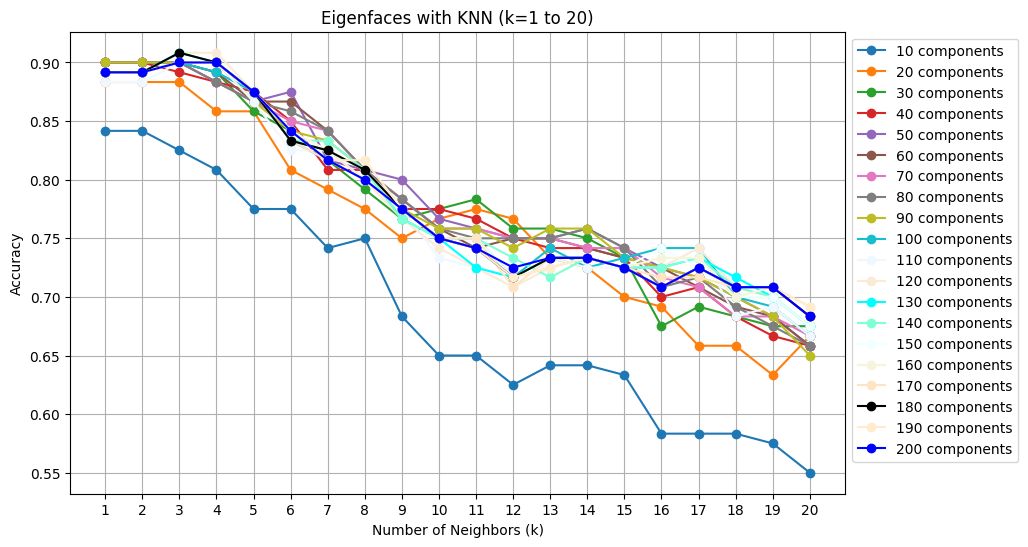

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

n_samples, height, width = X_train.shape
X_train = np.reshape(X_train, (n_samples, height * width))
n_samples, height, width = X_test.shape

pca = PCA()
pca.fit(X_train)

k_range = range(1, 21)

accuracies = []
max_accuracy = 0
best_n_components = 0
best_k = 0
n_components = list(range(10, 201, 10))

for component in n_components:
    eigenfaces = pca.components_[:component]

    weights = eigenfaces @ (X_train - pca.mean_).T

    component_accuracies = []
    for k in k_range:
        accuracy = 0

        for i in range(X_test.shape[0]):
            img_weight = eigenfaces @ (X_test[i].reshape(1, -1) - pca.mean_).T
            euclidean_distance = np.linalg.norm(weights - img_weight, axis=0)
            closest_indices = np.argsort(euclidean_distance)[:k]  # Indices of the k nearest neighbors

            neighbor_labels = [y_train[idx] for idx in closest_indices]

            predicted_label = Counter(neighbor_labels).most_common(1)[0][0]

            if y_test[i] == predicted_label:
                accuracy += 1

        accuracy = accuracy / X_test.shape[0]
        component_accuracies.append(accuracy)

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_n_components = component
            best_k = k

    accuracies.append(component_accuracies)

print("Best accuracy:", max_accuracy)
print("Best Components:", best_n_components)
print("Best k:", best_k)

eva_eigenfaces_knn=[max_accuracy,best_n_components,best_k]

colors = list(mcolors.TABLEAU_COLORS.keys()) + list(mcolors.CSS4_COLORS.keys())[:10]
colors = colors[:20]

plt.figure(figsize=(10, 6))

for i, (component_accuracy, color) in enumerate(zip(accuracies, colors)):
    plt.plot(k_range, component_accuracy, marker='o', color=color, label=f'{n_components[i]} components')

plt.title('Eigenfaces with KNN (k=1 to 20)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('evaluation/eigenfaces_knn.png')
plt.show()


## Eigenfaces with knn and hog

Best accuracy: 0.9083333333333333
Best Components: 100
Best k: 3


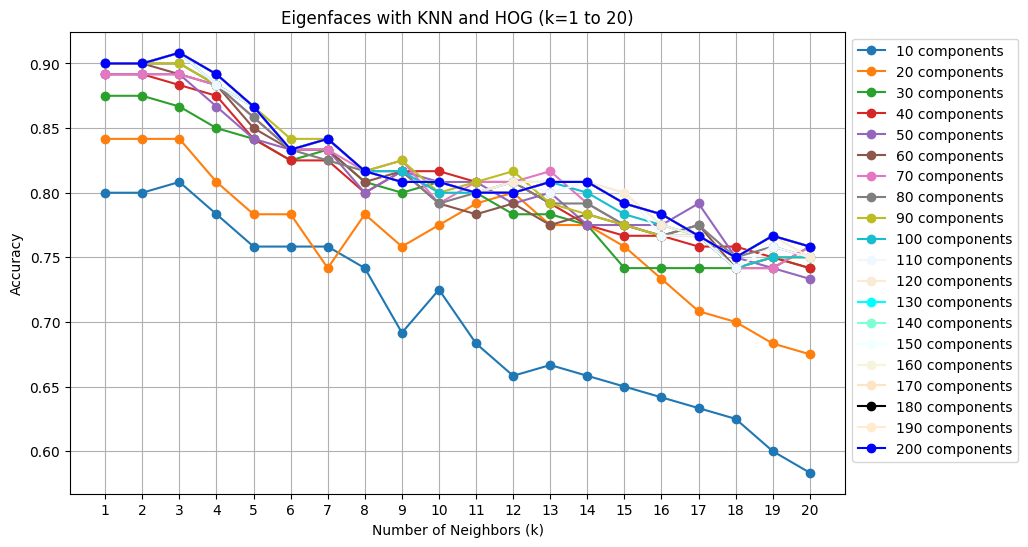

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

X_train2=[]
for img in X_train:
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=False)
    X_train2.append(hog_image)
X_train2=np.array(X_train2)

X_test2=[]
for img in X_test:
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=False)
    X_test2.append(hog_image)
X_test2=np.array(X_test2)

n_samples, height, width = X_train2.shape
X_train = np.reshape(X_train2, (n_samples, height * width))

n_samples, height, width = X_test2.shape
X_test = np.reshape(X_test2, (n_samples, height * width))

pca = PCA()
pca.fit(X_train)

k_range = range(1, 21)

accuracies = []
max_accuracy = 0
best_n_components = 0
best_k = 0
n_components = list(range(10, 201, 10))

for component in n_components:
    eigenfaces = pca.components_[:component]

    weights = eigenfaces @ (X_train - pca.mean_).T

    component_accuracies = []
    for k in k_range:
        accuracy = 0

        for i in range(X_test.shape[0]):
            img_weight = eigenfaces @ (X_test[i].reshape(1, -1) - pca.mean_).T
            euclidean_distance = np.linalg.norm(weights - img_weight, axis=0)
            closest_indices = np.argsort(euclidean_distance)[:k]  # Indices of the k nearest neighbors

            neighbor_labels = [y_train[idx] for idx in closest_indices]

            predicted_label = Counter(neighbor_labels).most_common(1)[0][0]

            if y_test[i] == predicted_label:
                accuracy += 1

        accuracy = accuracy / X_test.shape[0]
        component_accuracies.append(accuracy)

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_n_components = component
            best_k = k

    accuracies.append(component_accuracies)

print("Best accuracy:", max_accuracy)
print("Best Components:", best_n_components)
print("Best k:", best_k)

eva_eigenfaces_knn_hog=[max_accuracy,best_n_components,best_k]

colors = list(mcolors.TABLEAU_COLORS.keys()) + list(mcolors.CSS4_COLORS.keys())[:10]
colors = colors[:20]

plt.figure(figsize=(10, 6))

for i, (component_accuracy, color) in enumerate(zip(accuracies, colors)):
    plt.plot(k_range, component_accuracy, marker='o', color=color, label=f'{n_components[i]} components')

plt.title('Eigenfaces with KNN and HOG (k=1 to 20)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('evaluation/eigenfaces_knn_hog.png')
plt.show()

## Random Forest with raw data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

n_samples, height, width = X_train.shape
X_train = np.reshape(X_train, (n_samples, height * width))

n_samples, height, width = X_test.shape
X_test = np.reshape(X_test, (n_samples, height * width))

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


## Random Forest with HOG

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

X_train2=[]
for img in X_train:
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=False)
    X_train2.append(hog_image)
X_train2=np.array(X_train2)

X_test2=[]
for img in X_test:
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=False)
    X_test2.append(hog_image)
X_test2=np.array(X_test2)

n_samples, height, width = X_train2.shape
X_train = np.reshape(X_train2, (n_samples, height * width))

n_samples, height, width = X_test2.shape
X_test = np.reshape(X_test2, (n_samples, height * width))

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8916666666666667


## Comparation

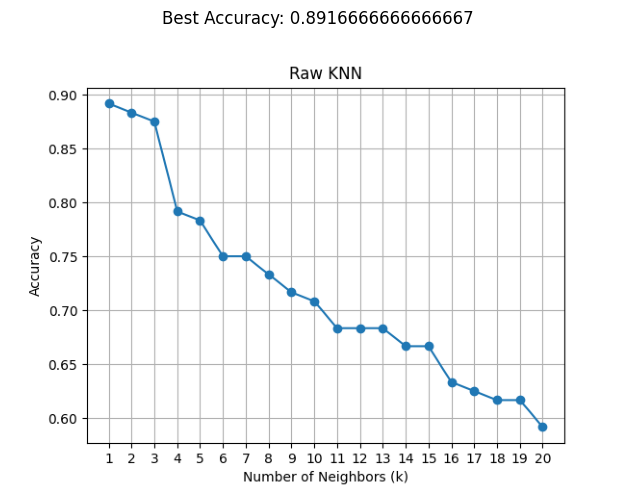

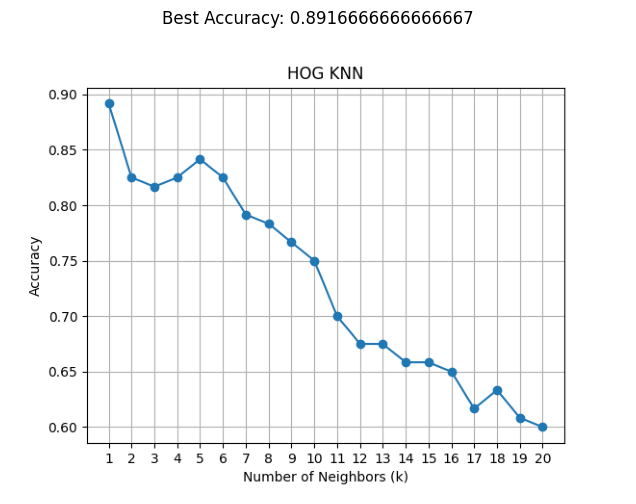

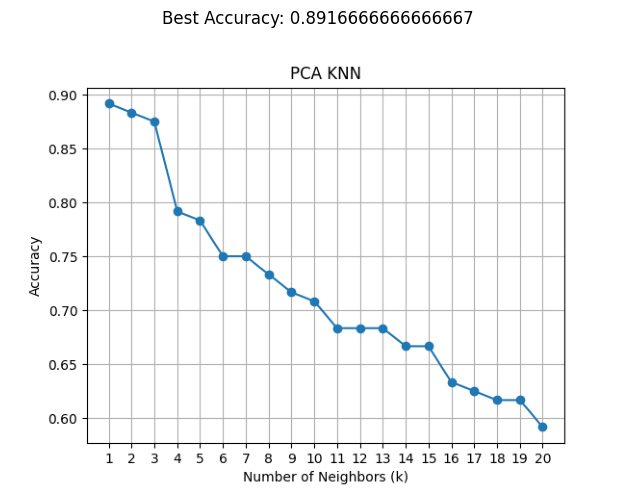

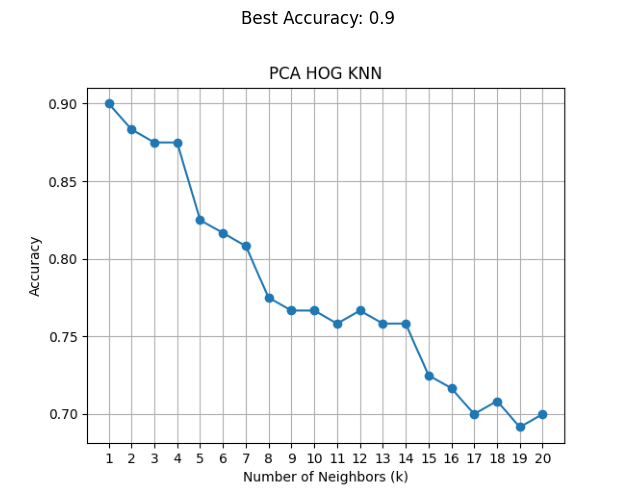

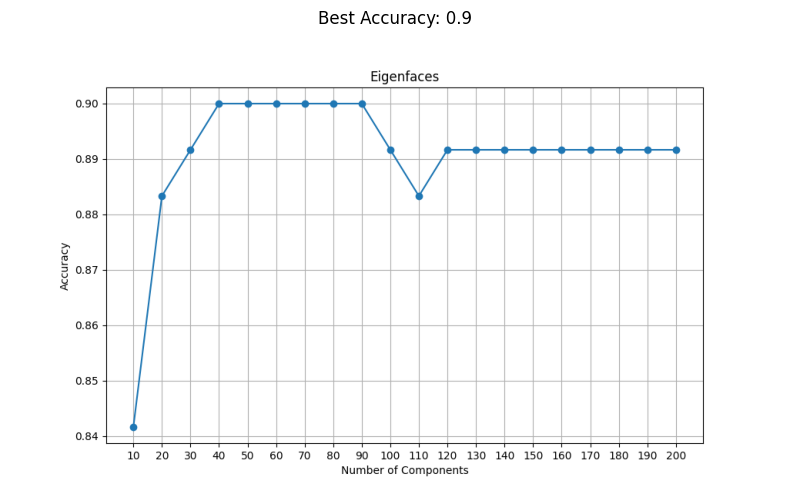

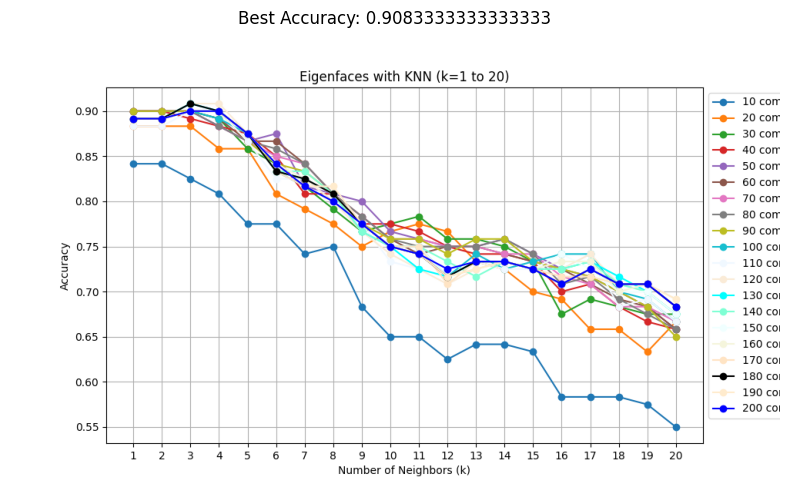

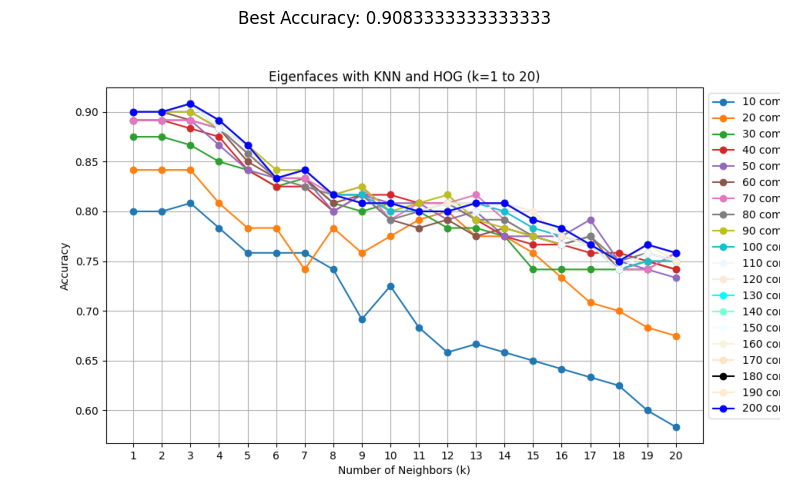

In [12]:
import cv2

# Load the images
raw_knn_img = cv2.imread('evaluation/raw_knn.png')
raw_knn_img = cv2.cvtColor(raw_knn_img, cv2.COLOR_BGR2RGB)
hog_knn_img = cv2.imread('evaluation/hog_knn.png')
hog_knn_img = cv2.cvtColor(hog_knn_img, cv2.COLOR_BGR2RGB)
pca_knn_img = cv2.imread('evaluation/pca_knn.png')
pca_knn_img = cv2.cvtColor(pca_knn_img, cv2.COLOR_BGR2RGB)
hog_pca_knn_img = cv2.imread('evaluation/hog_pca_knn.png')
hog_pca_knn_img = cv2.cvtColor(hog_pca_knn_img, cv2.COLOR_BGR2RGB)
eigenfaces_img = cv2.imread('evaluation/eigenfaces.png')
eigenfaces_img = cv2.cvtColor(eigenfaces_img, cv2.COLOR_BGR2RGB)
eigenfaces_knn_img = cv2.imread('evaluation/eigenfaces_knn.png')
eigenfaces_knn_img = cv2.cvtColor(eigenfaces_knn_img, cv2.COLOR_BGR2RGB)
eva_eigenfaces_knn_hog_img = cv2.imread('evaluation/eigenfaces_knn_hog.png')
eva_eigenfaces_knn_hog_img = cv2.cvtColor(eva_eigenfaces_knn_hog_img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 6))
plt.imshow(raw_knn_img)
plt.title('Best Accuracy: '+str(eva_raw_knn[0]))
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(hog_knn_img)
plt.title('Best Accuracy: '+str(eva_hog_knn[0]))
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(pca_knn_img)
plt.title('Best Accuracy: '+str(eva_pca_knn[0]))
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(hog_pca_knn_img)
plt.title('Best Accuracy: '+str(eva_pca_hog_knn[0]))
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(eigenfaces_img)
plt.title('Best Accuracy: '+str(eva_eigenfaces[0]))
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(eigenfaces_knn_img)
plt.title('Best Accuracy: '+str(eva_eigenfaces_knn[0]))
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(eva_eigenfaces_knn_hog_img)
plt.title('Best Accuracy: '+str(eva_eigenfaces_knn_hog[0]))
plt.axis('off')
plt.show()